In [65]:
import random
import gensim
import nltk
import codecs
import pymorphy2
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as pp

morph = pymorphy2.MorphAnalyzer()

In [66]:
filename = "ruscorpora_upos_skipgram_300_5_2018.vec"
path = "/home/katty/Загрузки/" + filename
model = gensim.models.KeyedVectors.load_word2vec_format(path)

In [67]:
text = codecs.open("/home/katty/anaconda3/_nlp/project_hp/corp/6.txt", "r", "utf-8").read()

In [111]:
normal_text = []
for word in nltk.tokenize.word_tokenize(text):
    if word.isalpha():
        morph_res = morph.parse(word.lower())[0]
        normal_text.append(morph_res.normal_form + "_" + str(morph_res.tag).split(",")[0])

normal_text = list(set(normal_text))
print(normal_text[:10])

['сдержать_PRTF', 'пышный_ADJF', 'скобка_NOUN', 'беспричинный_ADJF femn', 'прогудеть_VERB', 'заволочь_VERB', 'ступать_GRND', 'проигрывать_VERB', 'прятаться_VERB', 'путешествие_NOUN']


In [112]:
counter_non_words = 0
mx = []
using_words = []
for word in normal_text:
    try:
        vector = model.get_vector(word)
        mx.append(vector)
        using_words.append(word)
    except KeyError:
        counter_non_words += 1

print(len(normal_text), len(using_words), counter_non_words)

14273 6697 7576


In [134]:
vis_scaler = StandardScaler()
#vis_pca = PCA(2)
t_scales = vis_scaler.fit_transform(mx)
print("Scales done!")
t_2 = t_scales


Scales done!


In [135]:
num_cls = 30

kmeans = KMeans(num_cls)

cluster = kmeans.fit_predict(t_2)

[[-3.38308895e-01  5.49851085e-01 -4.40889396e-01 ... -1.39342906e-01
   7.43277019e-01 -2.57972044e-01]
 [ 4.32902495e-01  4.99672608e-02  4.93202872e-01 ...  2.29937473e-01
  -5.45250308e-02 -2.08474227e-02]
 [ 9.94016923e-03  3.01925633e-01 -3.92405308e-01 ... -4.33007460e-01
  -4.89389997e-02 -1.65441991e-01]
 ...
 [ 4.60265068e-01  5.79973922e-02  4.43643226e-02 ...  1.63317732e-02
  -6.79656661e-01  2.86493703e-04]
 [-5.89275383e-02  1.04558914e+00 -9.81602768e-02 ...  2.12404357e-02
  -6.37897594e-01  5.39014745e-01]
 [-2.68488950e-01 -8.72573437e-01  6.29712275e-01 ...  1.06298068e-01
   2.64013868e-02  2.36377409e-01]]


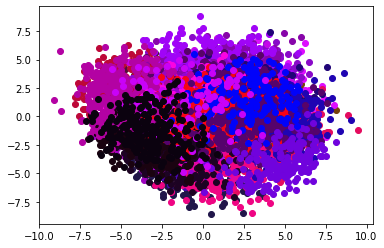

In [136]:
vis_scaler = StandardScaler()
vis_pca = PCA(2)
t_scales = vis_scaler.fit_transform(mx)
t_2_vis= vis_pca.fit_transform(t_scales)

cluster_system = []
for i in range(num_cls):
    cluster_system.append(t_2_vis[cluster==i, :])
#t_first = t_2[cluster == 0, :]
#t_second = t_2[cluster == 1, :]
#t_third = t_2[cluster == 2, :]
#t_fourth = t_2[cluster == 3, :]

# хотела вытащить центроидные слова, но пока сложно
centers = kmeans.cluster_centers_
print(centers)

for i in range(num_cls):
    color_r = random.randint(0, 1000)
    color_b = random.randint(0, 1000)
    pp.plot(cluster_system[i][:, 0], cluster_system[i][:, 1],  'o', color=(color_r/1000, 255/((i+1)*1000), color_b/1000, 1))
#pp.plot(t_second[:, 0], t_second[:, 1], 'oy')
#pp.plot(t_third[:, 0], t_third[:, 1], 'og')
#pp.plot(t_fourth[:, 0], t_fourth[:, 1], 'or')
#pp.plot(centers[:, 0], centers[:, 1], 'x')
#pp.xlim([-3, 3])
#pp.ylim([-3, 3])

In [137]:
cls = []

for i in range(num_cls):
    cls.append([])

for i in range(len(using_words)):
    for j in range(num_cls):
        if cluster[i] == j:
            cls[j].append(using_words[i])

print("Размеры кластеров:")
for i in range(num_cls):
    print(len(cls[i]))

for cls_ in cls:
    random.shuffle(cls_)
    print(cls_[:20])

Размеры кластеров:
165
217
207
312
210
258
259
335
164
187
142
199
315
182
229
218
160
290
187
220
148
258
242
312
291
195
170
287
101
237
['свист_NOUN', 'улюлюканье_NOUN', 'храп_NOUN', 'грянуть_VERB', 'звякать_VERB', 'звонок_NOUN', 'рыдание_NOUN', 'посвистывание_NOUN', 'сотрясать_VERB', 'голос_NOUN', 'бухать_VERB', 'слушать_VERB', 'плач_NOUN', 'ааа_NOUN', 'пение_NOUN', 'интонация_NOUN', 'загудеть_VERB', 'колокольчик_NOUN', 'восклицание_NOUN', 'аплодисменты_NOUN']
['новинка_NOUN', 'знаток_NOUN', 'галеон_NOUN', 'очко_NOUN', 'клуб_NOUN', 'достопримечательность_NOUN', 'артур_NOUN', 'десятка_NOUN', 'редактор_NOUN', 'известность_NOUN', 'чарли_NOUN', 'новичок_NOUN', 'фред_NOUN', 'джек_NOUN', 'балл_NOUN', 'урок_NOUN', 'участница_NOUN', 'лауреат_NOUN', 'искусствовед_NOUN', 'интервью_NOUN']
['загрустить_VERB', 'поразить_VERB', 'понравиться_VERB', 'разозлиться_VERB', 'порадоваться_VERB', 'насторожить_VERB', 'раздумывать_VERB', 'злиться_VERB', 'клонить_VERB', 'догадываться_VERB', 'позабыть_VERB',